In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats/test/test/7981.jpg
/kaggle/input/dogs-vs-cats/test/test/6234.jpg
/kaggle/input/dogs-vs-cats/test/test/1269.jpg
/kaggle/input/dogs-vs-cats/test/test/3863.jpg
/kaggle/input/dogs-vs-cats/test/test/6241.jpg
/kaggle/input/dogs-vs-cats/test/test/10304.jpg
/kaggle/input/dogs-vs-cats/test/test/623.jpg
/kaggle/input/dogs-vs-cats/test/test/2193.jpg
/kaggle/input/dogs-vs-cats/test/test/11925.jpg
/kaggle/input/dogs-vs-cats/test/test/3750.jpg
/kaggle/input/dogs-vs-cats/test/test/11378.jpg
/kaggle/input/dogs-vs-cats/test/test/2008.jpg
/kaggle/input/dogs-vs-cats/test/test/10730.jpg
/kaggle/input/dogs-vs-cats/test/test/5982.jpg
/kaggle/input/dogs-vs-cats/test/test/7737.jpg
/kaggle/input/dogs-vs-cats/test/test/2081.jpg
/kaggle/input/dogs-vs-cats/test/test/10597.jpg
/kaggle/input/dogs-vs-cats/test/test/6588.jpg
/kaggle/input/dogs-vs-cats/test/test/10054.jpg
/kaggle/input/dogs-vs-cats/test/test/7966.jpg
/kaggle/input/dogs-vs-cats/test/test/3919.jpg
/kaggle/input/dogs-vs-cats/te

In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random


2025-07-11 21:50:19.359375: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752270619.558632      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752270619.618628      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
# image properties
Image_Width=128
Image_Height=128
Image_Size=(Image_Width,Image_Height)
Image_Channels=3 #RGB

In [4]:
import os
import pandas as pd

# ✅ Correct folder path
folder_path = '/kaggle/input/dogs-vs-cats/train/train'

# ✅ Get all JPG filenames only
filenames = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]

# ✅ Optional: filter out test images if any (they usually don't start with 'dog.' or 'cat.')
filenames = [f for f in filenames if f.startswith('dog') or f.startswith('cat')]

# ✅ Generate labels: 1 for dog, 0 for cat
categories = [1 if fname.startswith('dog') else 0 for fname in filenames]

# ✅ Create the DataFrame
df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

# ✅ Preview
print(f"Total valid images: {len(df)}")
df.head()


Total valid images: 25000


filename  category
0  cat.12461.jpg         0
1   dog.3443.jpg         1
2   dog.7971.jpg         1
3  dog.10728.jpg         1
4   dog.1942.jpg         1

creating neural network model

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization


model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width,Image_Height,Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1752270633.277567      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,942,786 (49.37 MB)

 Trainable params: 12,941,314 (49.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [7]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.00001)
callbacks = [earlystop,learning_rate_reduction]

In [8]:
df["category"] = df["category"].replace({0:'cat',1:'dog'})
train_df,validate_df = train_test_split(df,test_size=0.20,
  random_state=42)

train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=15

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import os

# Image properties
Image_Width = 128
Image_Height = 128
Image_Size = (Image_Width, Image_Height)
Image_Channels = 3
batch_size = 15

# Make sure filename is string and clean
train_df['filename'] = train_df['filename'].astype(str)
validate_df['filename'] = validate_df['filename'].astype(str)
train_df = train_df.dropna().reset_index(drop=True)
validate_df = validate_df.dropna().reset_index(drop=True)

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Only rescaling for validation
validation_datagen = ImageDataGenerator(rescale=1./255)

# Train generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory="/kaggle/input/dogs-vs-cats/train/train",
    x_col='filename',
    y_col='category',
    target_size=Image_Size,
    class_mode='categorical',
    batch_size=batch_size
)

# Validation generator
validation_generator = validation_datagen.flow_from_dataframe(
    dataframe=validate_df,
    directory="/kaggle/input/dogs-vs-cats/train/train",
    x_col='filename',
    y_col='category',
    target_size=Image_Size,
    class_mode='categorical',
    batch_size=batch_size
)


Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [10]:
train_df['filename'].head()

0     dog.1260.jpg
1     cat.2883.jpg
2      dog.383.jpg
3     dog.4192.jpg
4    dog.12011.jpg
Name: filename, dtype: object

In [13]:
epochs=10
history = model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate // batch_size,
    steps_per_epoch=total_train // batch_size,
    callbacks=callbacks
)


Epoch 1/10
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 120s 90ms/step - accuracy: 0.7201 - loss: 0.5534 - val_accuracy: 0.7856 - val_loss: 0.4478 - learning_rate: 0.0010
Epoch 2/10
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8000 - loss: 0.4337 - val_accuracy: 0.7634 - val_loss: 0.5095 - learning_rate: 0.0010
Epoch 3/10
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 118s 89ms/step - accuracy: 0.7608 - loss: 0.5063 - val_accuracy: 0.7271 - val_loss: 0.5709 - learning_rate: 0.0010
Epoch 4/10
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8667 - loss: 0.4042 - val_accuracy: 0.6961 - val_loss: 0.6285 - learning_rate: 0.0010
Epoch 5/10
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 116s 87ms/step - accuracy: 0.7834 - loss: 0.4699 - val_accuracy: 0.7536 - val_loss: 0.6004 - learning_rate: 0.0010
Epoch 6/10
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7333 - loss: 0.3254 - val_accuracy: 0.7508 - val_loss: 0.6210 - learning_rate: 0.0010
Epoch 7/10
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 115s 86ms/step - accur

In [14]:
model.save("model1_catsVSdogs_10epoch.h5")

In [15]:
test_filenames = os.listdir("/kaggle/input/dogs-vs-cats/train/train")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [25]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ✅ Correct path to your test images
test_dir = "/kaggle/input/dogs-vs-cats/test/test"
Image_Size = (128, 128)
batch_size = 32

# Step 1: Load test filenames
test_filenames = os.listdir(test_dir)
test_df = pd.DataFrame({'filename': test_filenames})

# Step 2: Create ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1./255)

# Step 3: Create test generator
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=test_dir,
    x_col='filename',
    y_col=None,
    target_size=Image_Size,
    class_mode=None,
    batch_size=batch_size,
    shuffle=False
)

# Step 4: Predict
predict = model.predict(test_generator, steps=int(np.ceil(len(test_df) / batch_size)))

predicted_classes = np.argmax(predict, axis=1)

# Step 5: Map predictions
label_map = {0: 'cat', 1: 'dog'}
test_df['category'] = predicted_classes
test_df['category'] = test_df['category'].replace(label_map)

# Step 6: Show results
print(test_df.head())


Found 12500 validated image filenames.
391/391 ━━━━━━━━━━━━━━━━━━━━ 97s 246ms/step
   filename category
0  7981.jpg      dog
1  6234.jpg      cat
2  1269.jpg      dog
3  3863.jpg      cat
4  6241.jpg      dog


In [28]:
# Step 1: Convert predictions to class indices
test_df['category'] = np.argmax(predict, axis=-1)

# Step 2: Get label map from training generator
label_map = dict((v, k) for k, v in train_generator.class_indices.items())

# Step 3: Replace indices with class labels (e.g., 0 -> 'cat', 1 -> 'dog')
test_df['category'] = test_df['category'].replace(label_map)

# Step 4: If you need numeric labels again (e.g., cat=0, dog=1), do this:
test_df['category'] = test_df['category'].map({'cat': 0, 'dog': 1})


In [30]:
# Convert predicted softmax to class indices (0 or 1)
test_df['category'] = np.argmax(predict, axis=-1)

# Convert numeric class index to string labels (e.g., 0 -> 'cat', 1 -> 'dog')
label_map = dict((v, k) for k, v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

# Convert 'cat'/'dog' to 0/1 using map (recommended)
test_df['category'] = test_df['category'].map({'cat': 0, 'dog': 1})


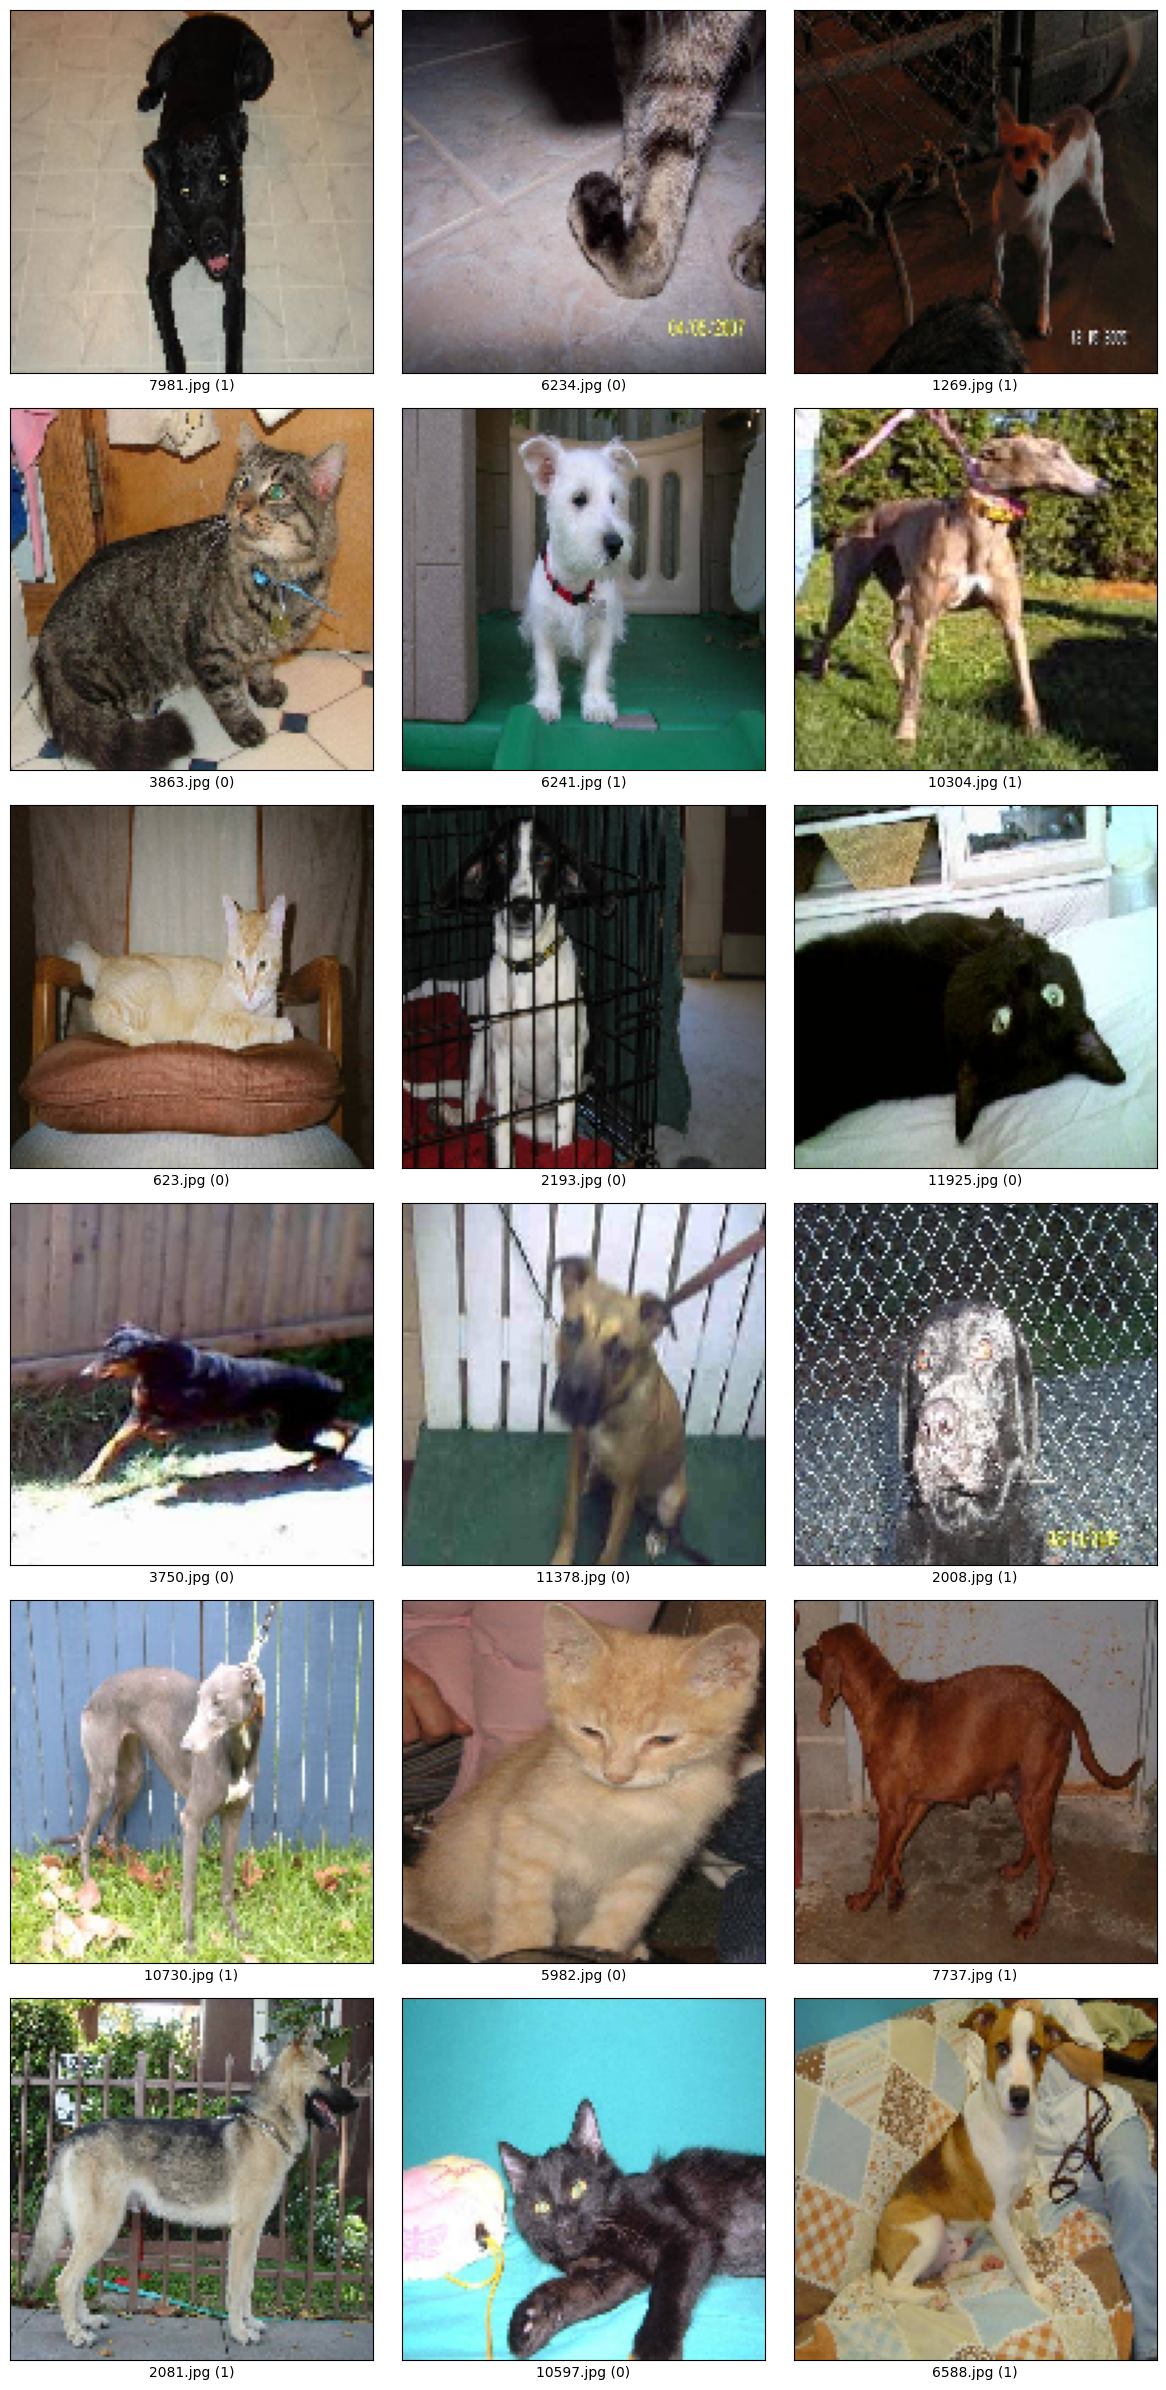

In [31]:
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

sample_test = test_df.head(18)

plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("/kaggle/input/dogs-vs-cats/test/test/" + filename, target_size=Image_Size)
    plt.subplot(6, 3, index + 1)
    plt.imshow(img)
    plt.xlabel(f"{filename} ({category})")
    plt.xticks([])  # remove ticks
    plt.yticks([])
plt.tight_layout()
plt.show()
